In [15]:
import h5py
import numpy as np
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt

In [16]:
data=h5py.File("/mnt/home/xiziyi/Packages_Research/PhaseNet-TF/dataset_yaqi/Alaska.hdf5","r")

In [3]:
()

array([[-21.51844054, -19.58085235, -14.93498582, ...,   0.61719335,
         -0.69525019,   0.82044112],
       [-26.41549296, -27.10343675, -25.79142358, ..., -15.88667107,
        -17.70744784, -17.2078691 ],
       [-38.91061705, -36.3170827 , -34.9110349 , ...,  19.812007  ,
         19.31175052,  18.81150119]])

In [15]:
for evid in tqdm(data,total=len(data)):
    for sta in data[evid]:
        test=data[evid][sta][:,:]
        test[np.isnan(test)]=0.0
        if np.sum(test)==0:
            print(evid,sta)

  0%|          | 0/7242 [00:00<?, ?it/s]

  6%|▌         | 418/7242 [01:11<19:19,  5.88it/s]


KeyboardInterrupt: 

In [8]:
test=torch.tensor(data["01865pswzl"]["Q19K"][:,:],dtype=torch.float32)

In [12]:
test[torch.isnan(test)]=0.0

In [13]:
test

tensor([[-440.5369, -434.5392, -433.5414,  ..., -547.2903, -543.2759,
         -526.2617],
        [ 199.3828,  161.3826,  132.3827,  ...,  463.7953,  444.7935,
          430.7916],
        [-178.6052, -185.6055, -190.6057,  ...,  529.5489,  546.5433,
          565.5378]])

In [14]:
torch.isnan(test).any()

tensor(False)

In [15]:
test=data["01865pswzl"]["Q19K"][0]
np.where(np.isnan(test))

(array([23559]),)

In [16]:
data["01865pswzl"]["Q19K"][0][23559]

nan

In [5]:
def fill_nan(tensor):
    if torch.isnan(tensor).any():
        mask = torch.isnan(tensor)
        cloned_tensor = tensor.clone()
        indices = torch.where(mask)
        for idx in zip(*indices):
            row, col = idx
            for j in range(col-1, -1, -1):
                if not torch.isnan(cloned_tensor[row, j]):
                    cloned_tensor[row, col] = cloned_tensor[row, j]
                    break
            else:
                cloned_tensor[row, col] = 0
        return cloned_tensor
    else: 
        return tensor

In [9]:
a=torch.ones(3,4800,dtype=torch.float32)
a[1,3]=torch.nan
a[1,4]=torch.nan

In [10]:
b=fill_nan(a)

In [12]:
b[1,4],a[1,4]

(tensor(1.), tensor(nan))

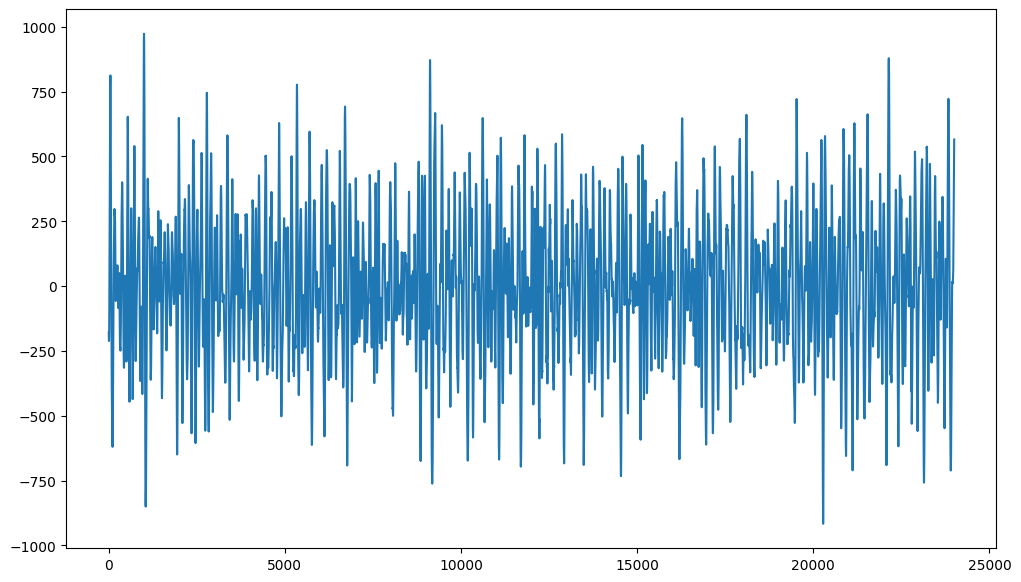

In [24]:
plt.figure(figsize=(12,7))
plt.plot(data["01865pswzl"]["Q19K"][2])